<a href="https://colab.research.google.com/github/sunaina88/Kaggle-Titanic-Dataset/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Choose a Dataset

### 1.1 Select a dataset from Kaggle, which is suitable for a classification task.

In [1]:
# we import modules for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [2]:
# the original dataset is from kaggle, uploaded to github for easy access
# we read the data into a dataframe

github_url = 'https://raw.githubusercontent.com/sunaina88/Kaggle-Titanic-Dataset/refs/heads/main/Titanic-Dataset.csv'
df = pd.read_csv(github_url)

In [3]:
# we observe the number of rows and columns

print(f"Dataset shape: {df.shape}")

Dataset shape: (891, 12)


In [4]:
# we observe the first 5 rows of the dataset

print("\nFirst 5 rows:\n")
df.head()


First 5 rows:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# we observe the last 5 rows of the dataset

print("\nLast 5 rows:\n")
df.tail()


Last 5 rows:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 2. Perform Analysis

### 2.1 Clean & preprocess the data (handle missing values, outliers, encoding, etc.).

In [6]:
# we check the data for missing values

print("Missing values:\n")
print(df.isnull().sum())

Missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# since we have missing values in 3 columns, we handle them one by one

# first, in the Age column, we have around 19.86% of missing values. so, we fill the missing Age values with the median of the values of that column

df['Age'] = df['Age'].fillna(df['Age'].median())

In [8]:
# next, we check the Cabin column. since there are too many missing values, around 77%, so we will drop the entire column.

df = df.drop('Cabin', axis=1)

In [9]:
# finally, in the Embarked column, we observe that there extremely few missing values, so we fill them with the mode of the values of that column.

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# we check if all missing values have been addressed

print('Current missing values:\n')
print(df.isnull().sum())

Current missing values:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [11]:
# we check for duplicates

print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [12]:
# here, we check the numerical features for outliers and plot a box plot to visualise the outliers and the range of the dataset

def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

print("Outlier Analysis:\n")

for col in numerical_cols:
    if col in df.columns:
        clean_data = df[col].dropna()
        outliers, lower_bound, upper_bound = detect_outliers_iqr(clean_data)

        print(f"\n{col}:")
        print(f"  Total values: {len(clean_data)}")
        print(f"  Total outliers: {len(outliers)}")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")

# the lower bound for SibSp is 0 as Q1 of SibSp is 0 & SibSp cannot be negative

Outlier Analysis:

Age:
  Total values: 891
  Total outliers: 66
  Lower bound: 2.50
  Upper bound: 54.50
Fare:
  Total values: 891
  Total outliers: 116
  Lower bound: -26.72
  Upper bound: 65.63
SibSp:
  Total values: 891
  Total outliers: 46
  Lower bound: -1.50
  Upper bound: 2.50
Parch:
  Total values: 891
  Total outliers: 213
  Lower bound: 0.00
  Upper bound: 0.00


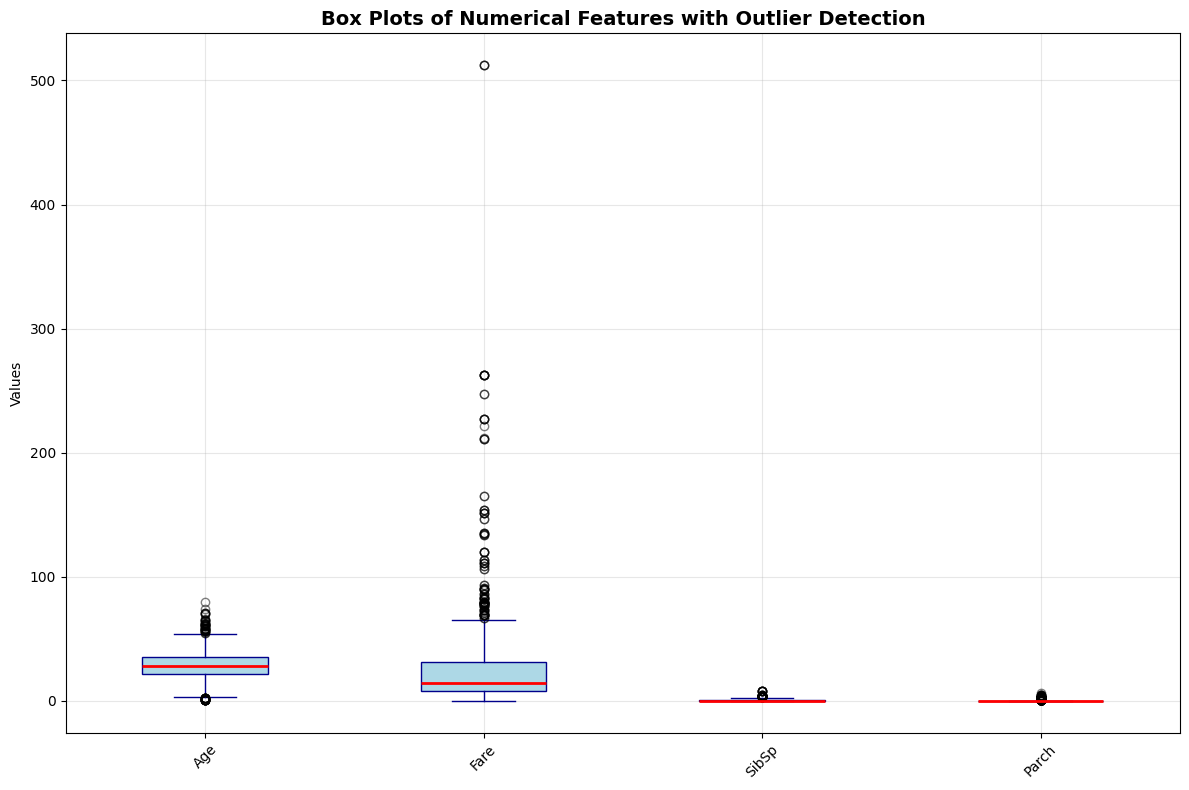

In [13]:
# we visualize all numerical features in one combined box plot

clean_data = {}
for feature in numerical_cols:
    clean_data[feature] = df[feature].dropna()

plt.figure(figsize=(12, 8))
box_data = [clean_data[feature] for feature in numerical_cols]
box = plt.boxplot(box_data,
                 patch_artist=True,
                 tick_labels=numerical_cols,
                 boxprops=dict(facecolor='lightblue', color='darkblue'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='darkblue'),
                 capprops=dict(color='darkblue'),
                 flierprops=dict(marker='o', color='red', alpha=0.5))

plt.title('Box Plots of Numerical Features with Outlier Detection', fontsize=14, fontweight='bold')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# we encode the categorical variables, Sex and Embarked, into numerical values

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

print("Encoded values:\n")
print(f"Sex: {dict(zip(le_sex.classes_, range(len(le_sex.classes_))))}")
print(f"Embarked: {dict(zip(le_embarked.classes_, range(len(le_embarked.classes_))))}")

print("\nModified dataframe looks like this:\n")
df.head(10)

Encoded values:

Sex: {'female': 0, 'male': 1}
Embarked: {'C': 0, 'Q': 1, 'S': 2}

Modified dataframe looks like this:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0


### 2.2 Conduct Exploratory Data Analysis (EDA) with key insights and visualizations.

In [15]:
# first, we perform a basic overview of our data

print(f"Dataframe shape: {df.shape}")
print(f"\nInformation about the dataset:\n")
df.info()
print(f"\nOverall survival rate: {df['Survived'].mean():.2%}")
print(f"Total passengers: {len(df)}")
print(f"Survivors: {df['Survived'].sum()}")
print(f"Non-survivors: {len(df) - df['Survived'].sum()}")
print(f"\nDescriptive statistics of the dataset:")
df.describe()

Dataframe shape: (891, 11)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB

Overall survival rate: 38.38%
Total passengers: 891
Survivors: 342
Non-survivors: 549

Descriptive statistics of the dataset:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [16]:
# we perform target variable (Survived) analysis

target_counts = df['Survived'].value_counts()
print("\nSurvival Counts:\n") # 1=survived, 0=didn't survive
print(target_counts)
target_percent = df['Survived'].value_counts(normalize=True)*100
print("\nSurvival Percentages:\n")
print(target_percent)


Survival Counts:

Survived
0    549
1    342
Name: count, dtype: int64

Survival Percentages:

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


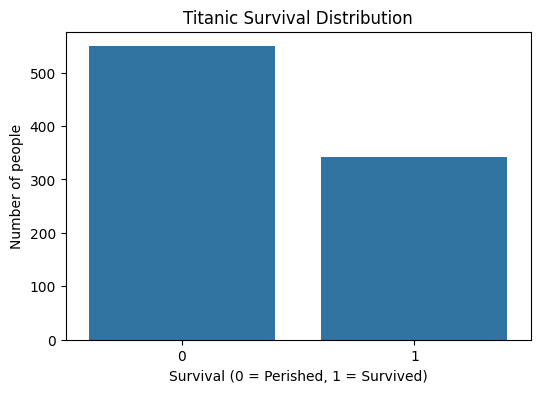

In [17]:
# we visualise the survival distribution: bar graph

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Titanic Survival Distribution')
plt.xlabel('Survival (0 = Perished, 1 = Survived)')
plt.ylabel('Number of people')
plt.show()

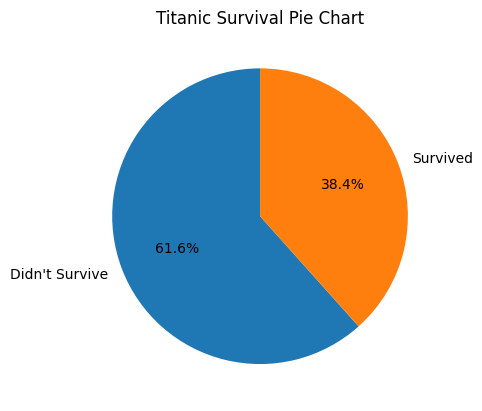

In [18]:
# we visualise the survival distribution: pie chart

plt.pie(target_counts, labels=['Didn\'t Survive', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Titanic Survival Pie Chart')
plt.show()

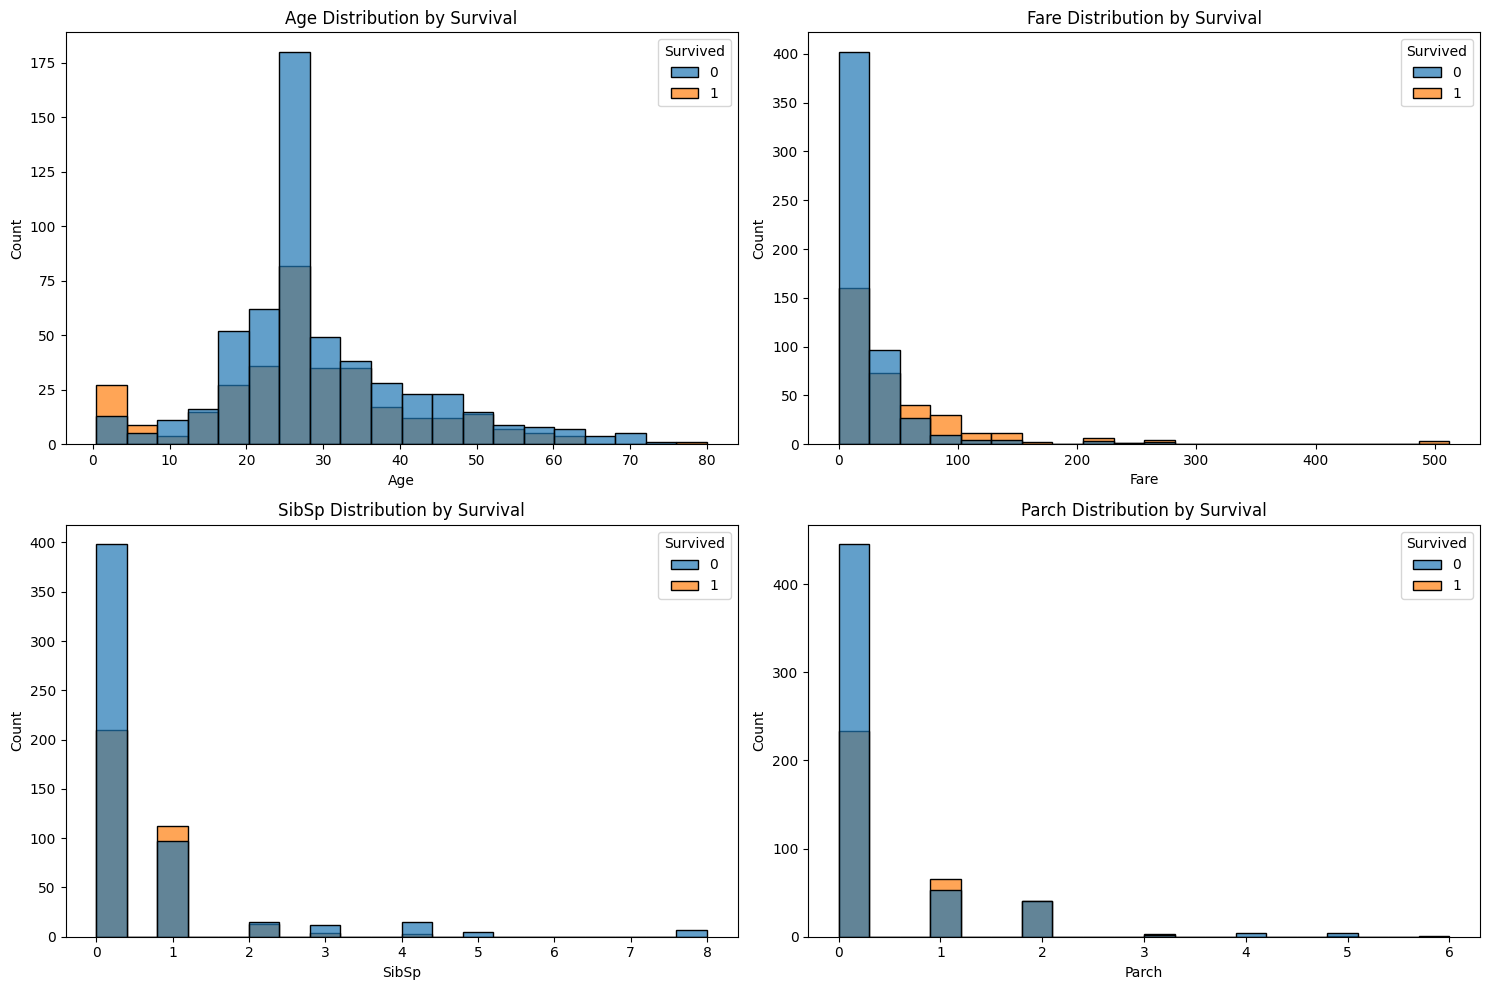

In [19]:
# we create histograms for all the numerical variables

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Survived', ax=axes[i], alpha=0.7, bins=20)
    axes[i].set_title(f'{col} Distribution by Survival')

plt.tight_layout()
plt.show()

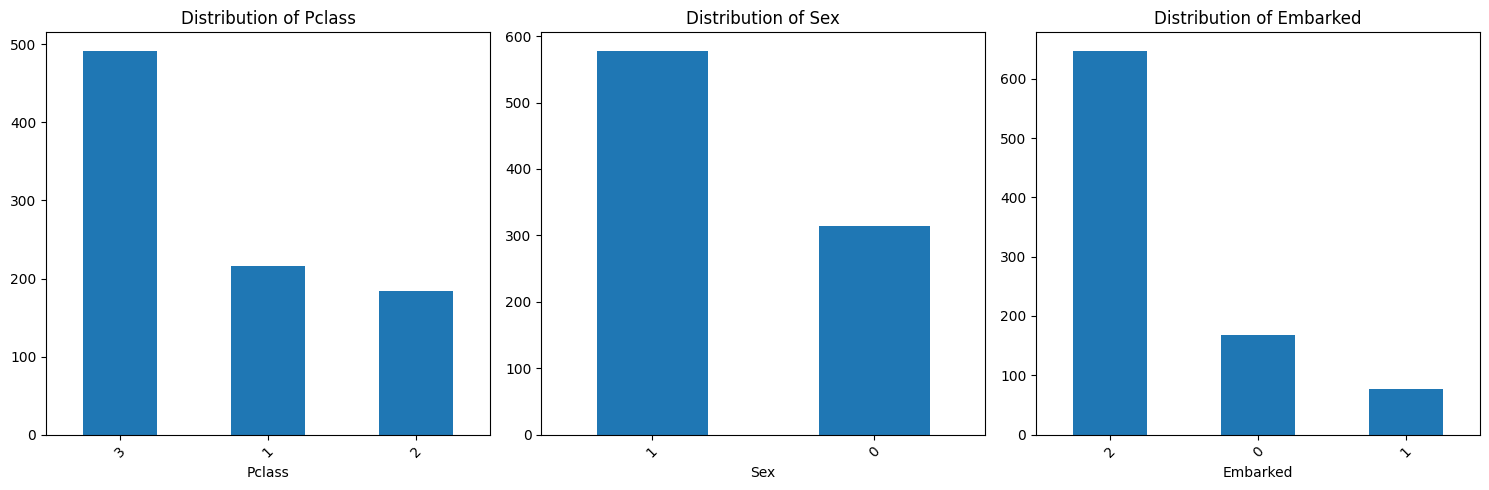

In [20]:
# we create feature distribution for the categorical columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
categorical_cols = ['Pclass', 'Sex', 'Embarked']

for i, feature in enumerate(categorical_cols):
    df[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

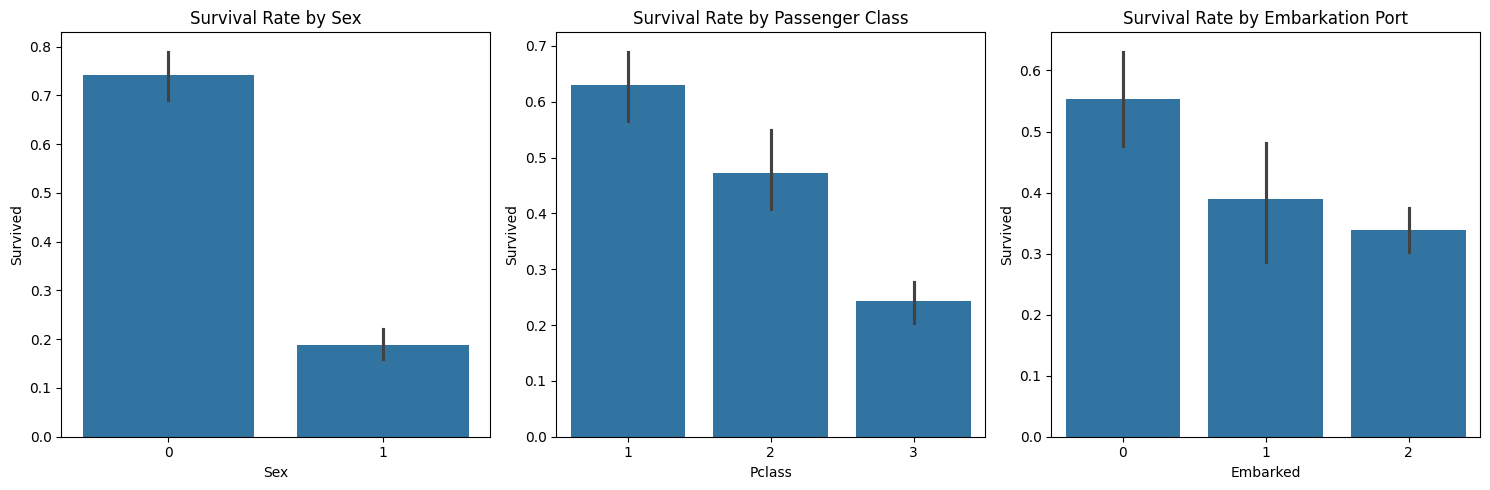

In [21]:
# now, we visualize bar graphs of survival rates by different categories

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# survival by sex

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival Rate by Sex')

# survival by passenger class

sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival Rate by Passenger Class')

# survival by embarkation port

sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[2])
axes[2].set_title('Survival Rate by Embarkation Port')

plt.tight_layout()
plt.show()


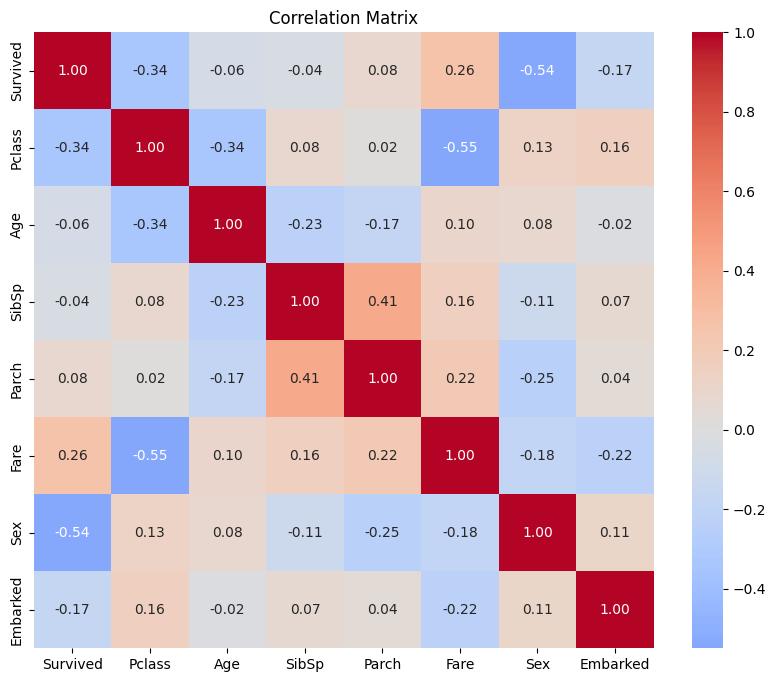

In [22]:
# we create a correlation matrix

cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

plt.figure(figsize=(10, 8))
correlation_matrix = df[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# finally, the key insights summary

print("Key EDA insights summary:\n")
print(f"Overall survival rate: {df['Survived'].mean():.1%}")
print(f"No. of women who survived: {df[df['Sex']==0]['Survived'].mean():.1%} vs Men: {df[df['Sex']==1]['Survived'].mean():.1%}")
print(f"No. of 1st Class passengers who survived: {df[df['Pclass']==1]['Survived'].mean():.1%} vs 3rd Class: {df[df['Pclass']==3]['Survived'].mean():.1%}")
print(f"Average age of Survivors: {df[df['Survived']==1]['Age'].mean():.1f} vs Non-survivors: {df[df['Survived']==0]['Age'].mean():.1f}")

Key EDA insights summary:

Overall survival rate: 38.4%
No. of women who survived: 74.2% vs Men: 18.9%
No. of 1st Class passengers who survived: 63.0% vs 3rd Class: 24.2%
Average age of Survivors: 28.3 vs Non-survivors: 30.0


In [24]:
# now, we split the data into training and testing sets for classification in our next part

X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)
print("Feature names:", X.columns.tolist())

Features shape (X): (891, 8)
Target shape (y): (891,)
Feature names: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [25]:
# now, we split the data into 80% for training, and 20% for testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# we verify the sizes of the sets and their outcomes

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Survival distribution in training set:\n")
print(y_train.value_counts(normalize=True))
print(f"Survival distribution in test set:\n")
print(y_test.value_counts(normalize=True))

Training set: (712, 8)
Testing set: (179, 8)
Survival distribution in training set:

Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Survival distribution in test set:

Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [27]:
# since we will be preparing the data for three different classification algorithms, we need to scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape:  {X_test_scaled.shape}")

print("The algorithm for which we will use original data is:\n")
print(f"Random Forest")
print(f"  X_train: {X_train.shape}, X_test: {X_test.shape}")

print("\nThe algorithms for which we will use scaled data are:\n")
print(f"Logistic Regression")
print(f"Support Vector Machine (SVM)")
print(f"  X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")

print(f"\nTarget variables (Survived):")
print(f"  y_train: {y_train.shape}, y_test: {y_test.shape}")

print("Survival Distribution - Training:")
print(y_train.value_counts(normalize=True).round(3))
print("\nSurvival Distribution - Testing:")
print(y_test.value_counts(normalize=True).round(3))

X_train_scaled shape: (712, 8)
X_test_scaled shape:  (179, 8)
The algorithm for which we will use original data is:

Random Forest
  X_train: (712, 8), X_test: (179, 8)

The algorithms for which we will use scaled data are:

Logistic Regression
Support Vector Machine (SVM)
  X_train_scaled: (712, 8), X_test_scaled: (179, 8)

Target variables (Survived):
  y_train: (712,), y_test: (179,)
Survival Distribution - Training:
Survived
0    0.617
1    0.383
Name: proportion, dtype: float64

Survival Distribution - Testing:
Survived
0    0.615
1    0.385
Name: proportion, dtype: float64


## 3. Build Models

### 3.1 Implement at least three classification algorithms (Logistic Regression, Random Forest and Support Vector Machine)
### Evaluate and compare models using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.

In [28]:
# we import all necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.svm import SVC

In [29]:
# next, we create a function to consistently evaluate models

def evaluate_model(model, X_test, y_test, model_name=""):

    # we make predictions

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # we calculate metrics

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # we create a results dictionary and display

    results = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"Results: {model_name}\n")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    print(f"\nConfusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    print(f"\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    return results, y_pred, y_pred_proba

In [30]:
# the first model we train is Random Forest (RF)

# we initialize and train the model

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# we evaluate the model

rf_results, rf_pred, rf_pred_proba = evaluate_model(rf_model, X_test, y_test, "Random Forest")

Results: Random Forest

Accuracy:  0.7933
Precision: 0.7500
Recall:    0.6957
F1-Score:  0.7218

Confusion Matrix:

[[94 16]
 [21 48]]

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [31]:
# the second model we train is Logistic Regression (LR)

# we initialize and train the model

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# we evaluate the model

lr_results, lr_pred, lr_pred_proba = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

Results: Logistic Regression

Accuracy:  0.7989
Precision: 0.7797
Recall:    0.6667
F1-Score:  0.7188

Confusion Matrix:

[[97 13]
 [23 46]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [32]:
# the third model we train is Support Vector Machine (SVM)

# we initialize and train the model

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# we evaluate the model

svm_results, svm_pred, svm_prob = evaluate_model(svm_model, X_test_scaled, y_test, "SVM")

Results: SVM

Accuracy:  0.7989
Precision: 0.7797
Recall:    0.6667
F1-Score:  0.7188

Confusion Matrix:

[[97 13]
 [23 46]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



### 3.2 Identify the best performing model with justification.

In [33]:
# first, we create a comparison dataframe

results = pd.DataFrame({
    'Logistic Regression': lr_results,
    'Random Forest': rf_results,
    'SVM': svm_results
})

print("Performance Comparison:\n")
print(results)


# we find the best model for each metric

print("\nBest models for each metric:\n")
for metric in results.index:
    best_model = results.loc[metric].idxmax()
    best_score = results.loc[metric].max()
    print(f"{metric}: {best_model} ({best_score:.4f})")

Performance Comparison:
           Logistic Regression  Random Forest       SVM
Accuracy              0.798883       0.793296  0.798883
Precision             0.779661       0.750000  0.779661
Recall                0.666667       0.695652  0.666667
F1-Score              0.718750       0.721805  0.718750

Best models for each metric:

Accuracy: Logistic Regression (0.7989)
Precision: Logistic Regression (0.7797)
Recall: Random Forest (0.6957)
F1-Score: Random Forest (0.7218)


In [34]:
# identify the best model

best_models = {}
for metric in results.index:
    if pd.notna(results.loc[metric]).all():
        best_model = results.loc[metric].idxmax()
        best_score = results.loc[metric].max()
        best_models[metric] = (best_model, best_score)
        print(f"{metric}: {best_model} → {best_score:.4f}")

Accuracy: Logistic Regression → 0.7989
Precision: Logistic Regression → 0.7797
Recall: Random Forest → 0.6957
F1-Score: Random Forest → 0.7218


In [35]:
# we will choose Random Forest as our best model for this prediction.

print("""We have chosen Random Forest as the best performing model. The reasons behind this are:

1. High Recall: RF shows the highest recall (0.6957) out of all the models, being able to identify 69.57% of the actual survivors of the Titanic.
This helps in minimizing the number of missed survivors.

2. Best F1-score: RF also shows the highest F1-score of 0.7218, which promises an optimal balance between precision and recall.

3. At-par performance with other models: RF has only slightly lower accuracy (0.7933) than LR and SVM (0.7989), which it makes up for in recall.

4. Titanic survival scenario: False negatives are crucial to be caught because if a survivor is considered dead when they actually survived,
then it causes a big problem. Thus, recall is the most important metric in our prediction case as we need to minimize the number of false positives,
so that our model is better at catching survivors.

Therefore, Random Forest is our go-to model for this scenario. Next, we will hyperparameter tune this model.""")

We have chosen Random Forest as the best performing model. The reasons behind this are:

1. High Recall: RF shows the highest recall (0.6957) out of all the models, being able to identify 69.57% of the actual survivors of the Titanic.
This helps in minimizing the number of missed survivors.

2. Best F1-score: RF also shows the highest F1-score of 0.7218, which promises an optimal balance between precision and recall.

3. At-par performance with other models: RF has only slightly lower accuracy (0.7933) than LR and SVM (0.7989), which it makes up for in recall.

4. Titanic survival scenario: False negatives are crucial to be caught because if a survivor is considered dead when they actually survived,
then it causes a big problem. Thus, recall is the most important metric in our prediction case as we need to minimize the number of false positives,
so that our model is better at catching survivors.

Therefore, Random Forest is our go-to model for this scenario. Next, we will hyperparamete

In [36]:
# according to the performance comparison, the best performing model is Random Forest overall.

from sklearn.model_selection import GridSearchCV

print("Performing hyperparameter tuning on Random Forest:\n")

# we define the parameter grid for Random Forest

param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees in the forest
    'max_depth': [10, 20, None],  # maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # minimum samples required at a leaf node
    'class_weight': [None, 'balanced', {0: 1, 1: 2}]  # handle class imbalance for better recall
}

# we initialize GridSearchCV

rf_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# we find the best parameters and score

print("\nBest parameters:", grid_search.best_params_)
print("\nBest cross-validation score:", grid_search.best_score_)

# we evaluate the tuned model

rf_tuned_model = grid_search.best_estimator_
rf_tuned_results, rf_tuned_pred, rf_tuned_proba = evaluate_model(rf_tuned_model, X_test, y_test, "Tuned Random Forest")

# now we compare the tuned model with the original one

print("\nImprovement after tuning:\n")
original_recall = rf_results['Recall']
tuned_recall = rf_tuned_results['Recall']
improvement = ((tuned_recall - original_recall) / original_recall) * 100
print(f"Recall: {original_recall:.4f} → {tuned_recall:.4f} ({improvement:+.2f}%)")

# finally, we compare all the metrics

print("\nFull metrics comparison - Random Forest (Original vs Tuned):")
comparison_df = pd.DataFrame({
    'Original': rf_results,
    'Tuned': rf_tuned_results
})
print(comparison_df)

Performing hyperparameter tuning on Random Forest:

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Best cross-validation score: 0.788013468013468
Results: Tuned Random Forest

Accuracy:  0.7989
Precision: 0.7200
Recall:    0.7826
F1-Score:  0.7500

Confusion Matrix:

[[89 21]
 [15 54]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       110
           1       0.72      0.78      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179


Improvement after tuning:

Recall: 0.6957 → 0.7826 (+12.50%)

Full metrics comparison - Random Forest (Original vs Tuned):
           Original     Tuned
Accuracy   0.793296  0.798883
Precision  0.750000  0.7

In [37]:
print("""We observe that Tuned RF has much higher recall by 12.5%, and can identify actual survivors 78.3% of the time.
It also has higher accuracy than before (0.7979), as well as a higher F1-score of 0.75, with an optimal balance between recall and precision,
which goes down slightly.
Thus, our hyperparameter tuning was successful.""")

We observe that Tuned RF has much higher recall by 12.5%, and can identify actual survivors 78.3% of the time.
It also has higher accuracy than before (0.7979), as well as a higher F1-score of 0.75, with an optimal balance between recall and precision,
which goes down slightly.
Thus, our hyperparameter tuning was successful.


In [38]:
# we perform feature importance analysis for the Tuned Random Forest model

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_tuned_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:\n")
print(feature_importance.head(10))


Top 10 Most Important Features:

       Feature  Importance
2          Sex    0.368164
6         Fare    0.180670
3          Age    0.127636
0  PassengerId    0.113213
1       Pclass    0.111014
4        SibSp    0.037003
7     Embarked    0.036065
5        Parch    0.026234


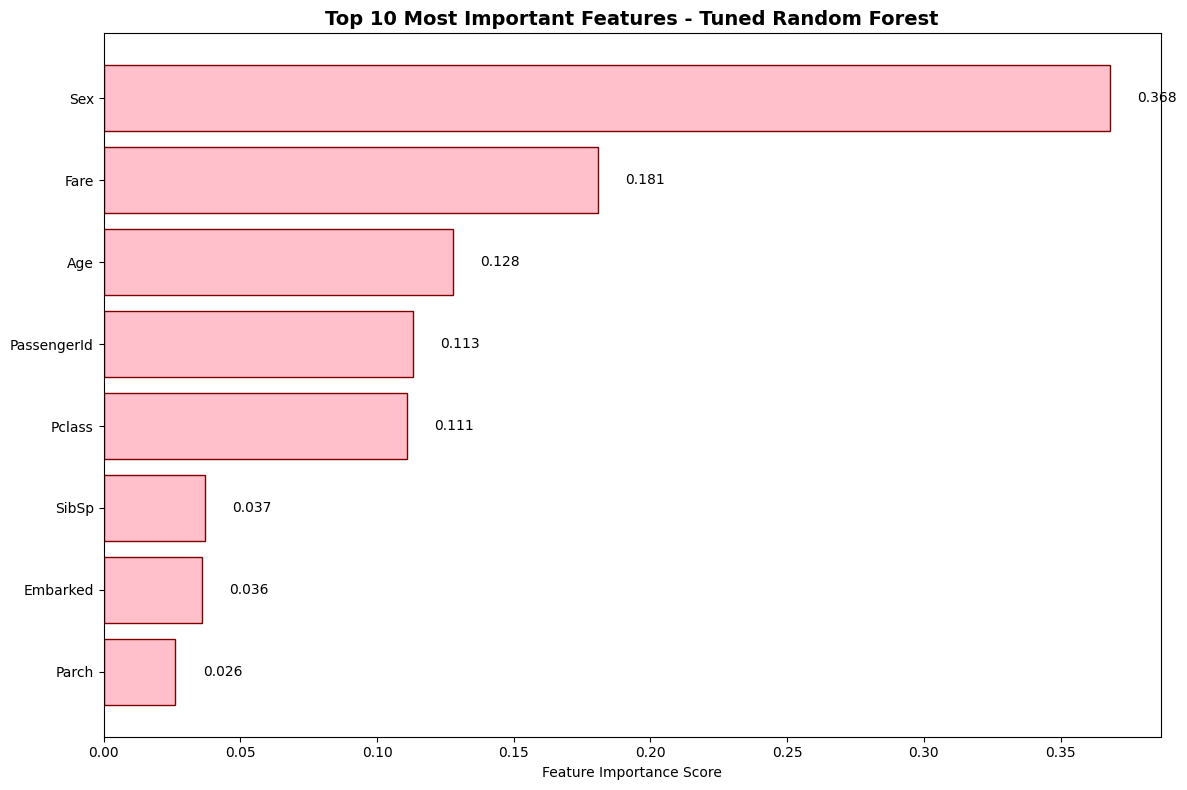

In [46]:
# we visualize the feature importance of Random Forest

plt.figure(figsize=(12, 8))
top_10 = feature_importance.head(10)

bars = plt.barh(top_10['Feature'], top_10['Importance'], color='pink', edgecolor='maroon')
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Most Important Features - Tuned Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

In [54]:
# final insights

print("Model Performance Summary:\n")
print(f"- Best Overall Model: Tuned Random Forest Classifier")
print(f"- Highest Accuracy: {rf_tuned_results['Accuracy']:.1%}")
print(f"- Best at Detecting Survivors (Recall): {rf_tuned_results['Recall']:.1%}")
print(f"- Most Reliable Predictions (Precision): {rf_tuned_results['Precision']:.1%}")
print(f"- Overall Balanced Performance (F1-Score): {rf_tuned_results['F1-Score']:.1%}")

print("\nTop Survival Indicators:\n")
top_risk_factors = feature_importance[feature_importance['Feature'] != 'PassengerId'].head(5)

for i, row in top_risk_factors.iterrows():
    importance_pct = (row['Importance'] / feature_importance['Importance'].sum()) * 100
    print(f"{i+1}. {row['Feature']}: {importance_pct:.1f}% of model's decision weight")

print(f"\nThe Tuned Random Forest model:\n")
print(f"- correctly identifies {rf_tuned_results['Recall']*100:.1f}% of passengers who survived.")
missed_cases = int((1 - rf_tuned_results['Recall']) * y_test.sum())
print(f"- misses approximately {missed_cases} out of {int(y_test.sum())} actual survivors.\n")

print("""Interpretation of the Model:

- Hyperparameter tuning improved survivor detection by 12.5%.
- Prioritizes passenger survival detection with strong recall and balanced precision.
- Ensemble method effectively captures key patterns like class, gender, and fare.
- Top survival indicators (e.g., sex, fare, age, class) align with historical Titanic findings.
- Model demonstrates reliable performance for data-driven survival prediction analysis.
- High interpretability and trustworthiness make it suitable for educational or research use.""")

Model Performance Summary:

- Best Overall Model: Tuned Random Forest Classifier
- Highest Accuracy: 79.9%
- Best at Detecting Survivors (Recall): 78.3%
- Most Reliable Predictions (Precision): 72.0%
- Overall Balanced Performance (F1-Score): 75.0%

Top Survival Indicators:

3. Sex: 36.8% of model's decision weight
7. Fare: 18.1% of model's decision weight
4. Age: 12.8% of model's decision weight
2. Pclass: 11.1% of model's decision weight
5. SibSp: 3.7% of model's decision weight

The Tuned Random Forest model:

- correctly identifies 78.3% of passengers who survived.
- misses approximately 14 out of 69 actual survivors.

Interpretation of the Model:

- Hyperparameter tuning improved survivor detection by 12.5%.
- Prioritizes passenger survival detection with strong recall and balanced precision.
- Ensemble method effectively captures key patterns like class, gender, and fare.
- Top survival indicators (e.g., sex, fare, age, class) align with historical Titanic findings.
- Model demon